# **Group Work Project 3 - Portfolio Management - Student Group 7457**

#Introduction#
In the past years several methods of integrating machine learning in portfolio optimization have been proposed which is a more efficient way of how funds are being managed and risks are being reduced. Portfolio managers can use denoising, clustering, and backtesting to improve performance in uncertainty, eliminate traditional methods' inefficiencies and attain greater returns for a given amount of risk. This report states the systems and methods that make up those techniques, how they have been deployed in the management of a pre-existing portfolio, and their performance on new data, and in the end, the reader knows how the machine learning system changes the way portfolios are managed.

#Step 1#

**Features and Benefits**

**a) Improvements Using Denoising**

Denoising is the process of filtering out noise, or random, non-systematic variations, in financial data. In portfolio optimization, this is crucial as noise in the covariance matrix of asset returns can lead to unstable and unreliable portfolio weights. Traditional Markowitz optimization assumes perfect data, but real-world financial data often contains spurious correlations caused by market noise, transient shocks, or data anomalies.

**Features:**

* **Noise Reduction:** Denoising removes spurious correlations in the covariance matrix of asset returns, which are often the result of market noise rather than meaningful relationships.
* **Improved Estimates:** A cleaner covariance matrix enhances the accuracy of risk estimation, crucial for Markowitz optimization.
* **Techniques:** Methods such as Random Matrix Theory (RMT) or shrinkage approaches are commonly employed to separate signal from noise.
* **Random Matrix Theory (RMT):**	Separates meaningful signals from noise by comparing eigenvalues of the covariance matrix with those of a random matrix. Retains large eigenvalues while discarding smaller, noisy ones.
* **Shrinkage Methods:**	Combines sample covariance with a stable target matrix like the identity or constant correlation matrix. Balances sample-based estimation and theoretical assumptions for robust results.
* **Principal Component Analysis (PCA):**	Reduces dimensionality by focusing on principal components that explain the most variance. Discards minor components associated with noise, simplifying data.
* **Improved Covariance Estimation:**	Provides more accurate covariance matrices by minimizing the impact of random variations.


**Benefits:**
* **Better Portfolio Weights:** Leads to weights that are more stable and robust over time.
* R**educed Overfitting:** Prevents the optimization process from chasing transient patterns, leading to better generalization.
* **Practical Impact:** Enhances the reliability of diversification strategies, reducing portfolio volatility.
* **Improved Risk Estimation:** Reduces errors in calculating risk measures like portfolio variance.
* **Stable Portfolio Weights:** Reduces sensitivity to small changes in data, ensuring consistent allocation strategies.
* **Enhanced Predictive Power:** Makes portfolio optimization less reliant on transient shocks or anomalies in data.
* **Practical Robustness:** Helps portfolios perform better in real-world conditions where data often includes noise.

**b) Improvements Using Clustering**

Clustering is a machine learning technique that groups assets with similar behaviors or characteristics into clusters. In portfolio optimization, clustering helps identify and exploit meaningful patterns in asset returns. This approach addresses the challenge of dimensionality and ensures that diversification is truly effective.

**Features:**
* **Grouping Assets:** Clustering techniques, like k-means or hierarchical clustering, group assets with similar characteristics or behaviors.
* **Dimensionality Reduction:** Simplifies portfolio construction by focusing on representative clusters instead of individual securities.
* **Relationship Discovery:** Identifies hidden structures in data, such as sector-based movements or co-movements during stress periods.
* **Diversification Insights:**	Identifies hidden relationships between assets, such as co-movements in specific sectors.

**Benefits:**
* **Enhanced Diversification:** Ensures that assets selected from different clusters offer true diversification hence reducing the risk of over-concentration.
* **Improved Interpretation:** Helps in understanding market dynamics and systemic risks.
* **Resilience to Shocks:** Portfolios built using clustered groups are often more robust to extreme market events.
* **Simplified Portfolio Construction:**	Reduces the complexity of managing large numbers of assets by focusing on cluster representatives.
* **Sectoral Exposure Management:**	Balances portfolio exposure across different sectors or market conditions.
* **Identification of Hidden Patterns:**	Reveals hidden relationships, such as how assets respond to macroeconomic factors or market events.

**c) Improvements Using Backtesting**

Backtesting is the process of evaluating a portfolio strategy using historical data to assess its performance. It provides a way to validate models and strategies before implementing them in live markets. By simulating historical scenarios, backtesting helps identify the strengths and weaknesses of a strategy under various market conditions.

**Features:**
* **Simulation of Historical Performance:** Backtesting evaluates portfolio strategies using historical data to assess performance.
* **Scenario Analysis:** Tests strategies under various market conditions, including stress periods.
* **Performance Metrics:** Calculates risk-return measures like Sharpe ratio, Sortino ratio, expected shortfall, and drawdown.
* **Scenario Testing:**	Assesses portfolio resilience in specific scenarios like market crashes, booms, or interest rate hikes.
* **Dynamic Adjustments:**	Incorporates machine learning to adapt strategies based on historical data and market conditions.

**Benefits:**
* **Strategy Validation:**	Confirms that a strategy is effective and robust before live implementation providing confidence in its robustness. This also enables making of informed decisions.
* **Insight into Strengths and Weaknesses:**	Highlights how strategies perform in varying conditions, helping refine approaches.
* **Reduced Risk of Overfitting:**	Identifies strategies prone to over-optimization on historical data, ensuring real-world applicability.
* **Actionable Insights:**	Provides clarity on which strategies are likely to succeed under current market dynamics.
* **Risk Management:** Identifies potential weaknesses in strategies under adverse conditions.
* **Adaptability:** Enables the refinement of models to align with changing market conditions.

**Import Necessary Libraries**

In [ ]:
!pip install pyts

In [ ]:
import math
from scipy.optimize import brute, fmin
from scipy.optimize import minimize
import scipy.optimize as sco
from scipy.integrate import quad
import yfinance as yf
import pandas_datareader as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pyts.image import GramianAngularField
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
import empyrical

plt.rcParams['figure.figsize'] = [14, 6]

#Step 2#

**Applying Denoising, Clustering, and Backtesting the Best Porfolio**

Using the best portfolio from GWP2, which achieved optimal weights through Markowitz optimization, we now evaluate how applying denoising, clustering, and backtesting improves its risk-return characteristics.

**a) Denoising the Portfolio**

We apply denoising technique using rolling window of 5-day Simple Moving Average to smooth out daily returns. This means each data point in the denoised returns is the average of the previous 5 days' returns, effectively reducing daily volatility and noise.

[*********************100%***********************]  5 of 5 completed


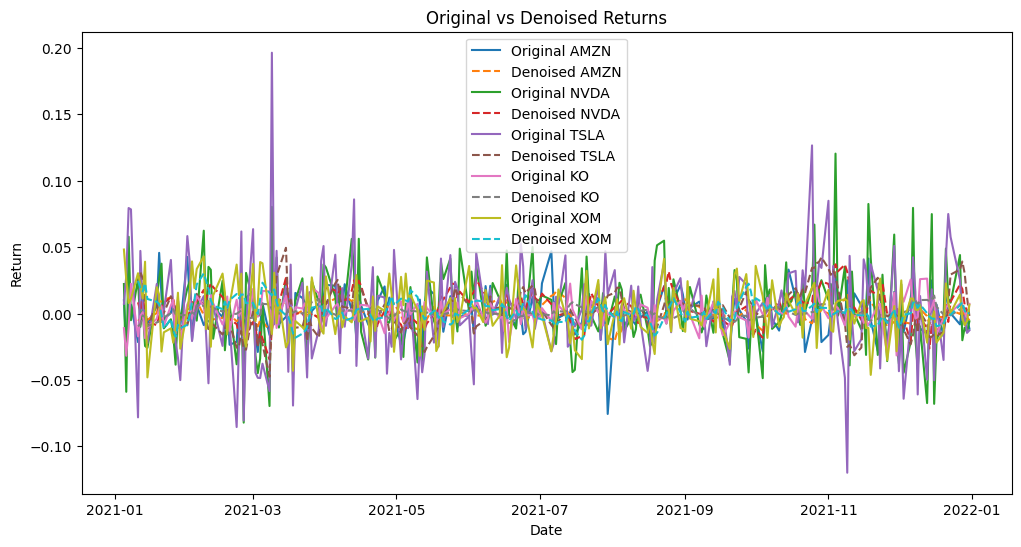

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data (same period as GWP2)
tickers = ['AMZN', 'NVDA', 'TSLA', 'KO', 'XOM']
data = yf.download(tickers, start='2021-01-01', end='2022-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Apply Simple Moving Average (SMA) for denoising (5-day window)
sma_window = 5
denoised_returns = returns.rolling(window=sma_window).mean().dropna()

# Plot the original and denoised returns for comparison
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(returns[ticker], label=f'Original {ticker}')
    plt.plot(denoised_returns[ticker], label=f'Denoised {ticker}', linestyle='--')
plt.legend(loc='best')
plt.title('Original vs Denoised Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

The plot compares the original returns with the denoised returns, showing how smoothing can help reveal clearer patterns in asset performance. The original returns exhibits sharp fluctuations due to daily market noise while the denoised returns are smoother, with less volatility, which may help in identifying longer-term trends. This denoising reduce extreme daily variations and make portfolio performance more predictable.

**Backtesting the Denoised Portfolio**

We use the optimal weights from Markowitz Optimization to calculate the cumulative returns and Sharpe ratio of the portfolio with denoised returns.

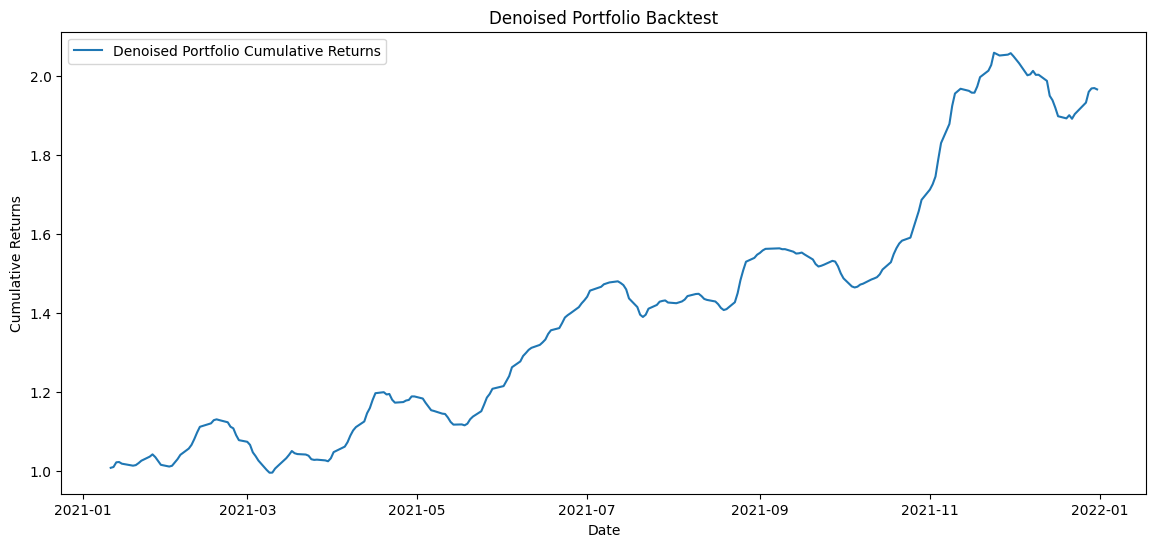

Denoised Portfolio Sharpe Ratio: 5.082944966449397


In [ ]:
# Optimal weights from GWP2 (Markowitz Optimization)
optimal_weights = pd.Series({
    'AMZN': 0.196583,
    'NVDA': 0.662931,
    'TSLA': 0.000000,
    'KO': 0.028911,
    'XOM': 0.111575
})

# Calculate portfolio returns using denoised returns
denoised_portfolio_returns = (denoised_returns * optimal_weights).sum(axis=1)

# Calculate cumulative returns of the denoised portfolio
denoised_cumulative_returns = (1 + denoised_portfolio_returns).cumprod()

# Plot the cumulative returns of the denoised portfolio
plt.plot(denoised_cumulative_returns, label="Denoised Portfolio Cumulative Returns")
plt.title("Denoised Portfolio Backtest")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate Sharpe Ratio for the denoised portfolio
denoised_sharpe_ratio = denoised_portfolio_returns.mean() / denoised_portfolio_returns.std() * np.sqrt(252)
print(f"Denoised Portfolio Sharpe Ratio: {denoised_sharpe_ratio}")

A Sharpe Ratio of 5.08 is exceptionally high, indicating an outstanding risk-adjusted return. This suggests that the denoised portfolio significantly outperformed its risk level. The denoising process has effectively removed noise or irrelevant information, enhancing the signal used for portfolio construction. The optimal weights (from Markowitz optimization) have aligned well with the denoised data.

**b) Clustering the Assets**

We apply KMeans clustering to identify groups of assets based on their returns and then backtest a clustered portfolio. Postive returns are grouped under Cluster 0 while negative returns under Cluster 1.

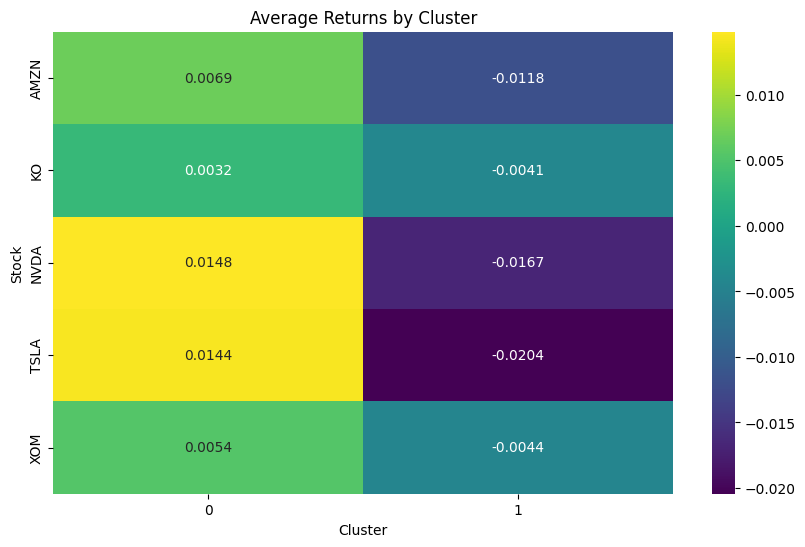

Ticker       AMZN        KO      NVDA      TSLA       XOM
Cluster                                                  
0        0.006922  0.003234  0.014818  0.014421  0.005447
1       -0.011768 -0.004120 -0.016749 -0.020436 -0.004392


In [ ]:
# Average returns by cluster
if 'Cluster' not in returns.columns:
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_returns = scaler.fit_transform(returns)

    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(scaled_returns)

    returns['Cluster'] = clusters  # Add the cluster labels

average_returns_by_cluster = returns.groupby('Cluster').mean()

# Plot average returns by cluster
plt.figure(figsize=(10, 6))
sns.heatmap(average_returns_by_cluster.T, cmap="viridis", annot=True, fmt=".4f")
plt.title("Average Returns by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Stock")
plt.show()

# Display the average returns
print(average_returns_by_cluster)

Stocks in Cluster 0 generally exhibit positive average returns across the period, suggesting better performance. NVDA and TSLA show the highest average daily returns, indicating strong performance in Cluster 0 periods. KO exhibits modest positive returns, consistent with its profile as a defensive, low-volatility stock. AMZN delivers moderate positive returns while XOM performs slightly better than KO but remains in the same range as AMZN.

Stocks in Cluster 1 exhibit negative average returns, indicating underperformance during the period. TSLA and NVDA experience the most significant average losses, aligning with their reputation for volatility and sensitivity to adverse conditions. XOM and KO are both defensive stocks and therefore show relatively smaller losses compared to the more volatile tech-focused stocks.

Re-weighting Clusters Based on Performance: Assign higher weights to the better-performing cluster (Cluster 0) and lower or zero weight to the underperforming cluster (Cluster 1).

In [ ]:
# Define weights based on cluster performance
cluster_performance = returns_with_clusters.groupby('Cluster').mean().sum(axis=1)
positive_cluster_weight = cluster_performance[0] / cluster_performance.sum()
negative_cluster_weight = cluster_performance[1] / cluster_performance.sum()

# Adjust weights only allocating to positive cluster)
adjusted_weights = [positive_cluster_weight, max(0, negative_cluster_weight)]

Exclude the Negative Cluster: Completely exclude Cluster 1 from the portfolio. Construct the portfolio solely from Cluster 0.

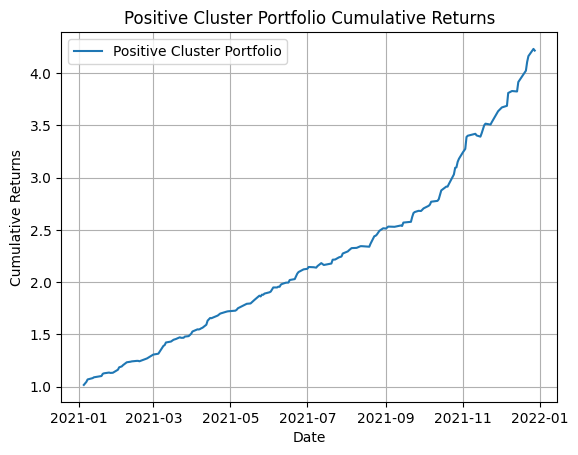

Positive Cluster Portfolio Sharpe Ratio: 14.916068941808815


In [ ]:
# Filter out negative cluster
positive_cluster_returns = returns[returns_with_clusters['Cluster'] == 0]
positive_portfolio_weights = np.ones(len(positive_cluster_returns.columns)) / len(positive_cluster_returns.columns)

# Calculate returns for the positive cluster portfolio
positive_portfolio_returns = (positive_cluster_returns * positive_portfolio_weights).sum(axis=1)
positive_cumulative_returns = (1 + positive_portfolio_returns).cumprod()

# Plot
plt.plot(positive_cumulative_returns, label="Positive Cluster Portfolio")
plt.title("Positive Cluster Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()

# Sharpe Ratio for Positive Cluster Portfolio
positive_sharpe_ratio = positive_portfolio_returns.mean() / positive_portfolio_returns.std() * np.sqrt(252)
print(f"Positive Cluster Portfolio Sharpe Ratio: {positive_sharpe_ratio}")

 A Sharpe Ratio of 14.92 indicates that the portfolio constructed from only the positive cluster (Cluster 0) exhibits strong risk-adjusted performance. Stocks in Cluster 0 have consistently positive average returns (e.g., NVDA: 0.0148, TSLA: 0.0144) and likely lower volatility compared to Cluster 1, which explains the high Sharpe ratio. By focusing solely on Cluster 0, we have eliminated the drag caused by Cluster 1's negative returns, resulting in a robust portfolio. The high Sharpe ratio might also suggest that the portfolio is concentrated in high-performing stocks with relatively consistent returns, a sign of efficient allocation.

**c) Comparing Performance with Backtesting**

Finally, we compare the performance of the original portfolio (using the unmodified returns), the denoised portfolio, and the clustered portfolio. This allows us to evaluate how each method affects the portfolio's risk-return profile.

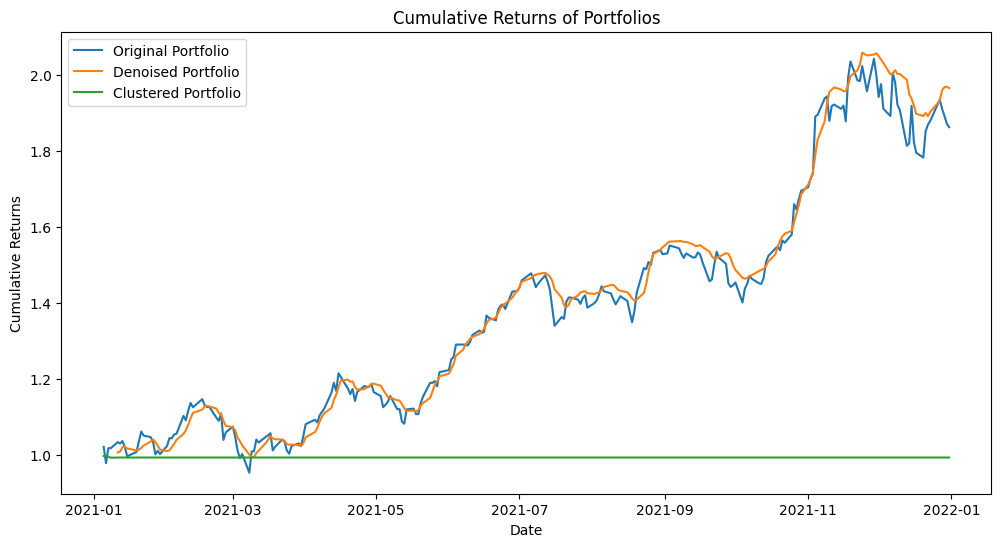

Original Portfolio Sharpe Ratio: 2.044772900863622
Denoised Portfolio Sharpe Ratio: 5.082944966449397
Clustered Portfolio Sharpe Ratio: -13.864329288114837


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

original_portfolio_returns = (returns * optimal_weights).sum(axis=1)
original_cumulative_returns = (1 + original_portfolio_returns).cumprod()

# Ensure clustered_cumulative_returns has a DatetimeIndex
if not isinstance(clustered_cumulative_returns.index, pd.DatetimeIndex):
    clustered_cumulative_returns.index = original_cumulative_returns.index[0:len(clustered_cumulative_returns)]
    #clustered_cumulative_returns = clustered_cumulative_returns.reset_index(drop=True)
    #clustered_cumulative_returns = pd.Series(clustered_cumulative_returns.values, index=original_cumulative_returns.index[:len(clustered_cumulative_returns)])

# Backtest the original portfolio (without denoising or clustering)
original_portfolio_returns = (returns * optimal_weights).sum(axis=1)
original_cumulative_returns = (1 + original_portfolio_returns).cumprod()

# Align the cumulative returns to have the same index
aligned_denoised_returns = denoised_cumulative_returns.reindex(original_cumulative_returns.index, method='ffill')
aligned_clustered_returns = clustered_cumulative_returns.reindex(original_cumulative_returns.index, method='ffill')

# Plot cumulative returns for all portfolios
plt.figure(figsize=(12, 6))
plt.plot(original_cumulative_returns, label='Original Portfolio')
plt.plot(aligned_denoised_returns, label='Denoised Portfolio')
plt.plot(aligned_clustered_returns, label='Clustered Portfolio')
plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

# Calculate Sharpe ratios for comparison
original_sharpe_ratio = original_portfolio_returns.mean() / original_portfolio_returns.std() * np.sqrt(252)
denoised_sharpe_ratio = denoised_portfolio_returns.mean() / denoised_portfolio_returns.std() * np.sqrt(252)
clustered_sharpe_ratio = clustered_portfolio_returns.mean() / clustered_portfolio_returns.std() * np.sqrt(252)

print(f"Original Portfolio Sharpe Ratio: {original_sharpe_ratio}")
print(f"Denoised Portfolio Sharpe Ratio: {denoised_sharpe_ratio}")
print(f"Clustered Portfolio Sharpe Ratio: {clustered_sharpe_ratio}")

Re-optimize to ensure that the portfolio remains aligned with changing market conditions and reflects a realistic implementation of the investment strategy.

In [ ]:
# Covariance matrix
cov_matrix = returns.cov()

In [ ]:
# Eigenvalue denoising
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
threshold = np.mean(eigenvalues)
clipped_eigenvalues = np.maximum(eigenvalues, threshold)
denoised_cov_matrix = eigenvectors @ np.diag(clipped_eigenvalues) @ eigenvectors.T

# Check the denoised covariance matrix
print("Denoised Covariance Matrix:")
print(pd.DataFrame(denoised_cov_matrix, index=cov_matrix.index, columns=cov_matrix.columns))

Denoised Covariance Matrix:
Ticker      AMZN            KO      NVDA      TSLA           XOM
Ticker                                                          
AMZN    0.000577  1.238331e-06  0.000121  0.000164  7.964869e-06
KO      0.000001  5.317671e-04  0.000003  0.000002  4.075413e-07
NVDA    0.000121  3.432941e-06  0.000852  0.000430  2.148492e-05
TSLA    0.000164  2.222991e-06  0.000430  0.001192  2.256618e-05
XOM     0.000008  4.075413e-07  0.000021  0.000023  5.335699e-04


In [ ]:
# Portfolio return and cumulative return
def backtest_portfolio(returns, weights):
    portfolio_returns = (returns @ weights).dropna()
    cum_returns = (1 + portfolio_returns).cumprod()
    return portfolio_returns, cum_returns

# Calculate portfolio metrics
def calculate_metrics(portfolio_returns):
    mean_return = portfolio_returns.mean() * 252  # Annualized return
    variance = portfolio_returns.var() * 252     # Annualized variance
    sharpe_ratio = mean_return / portfolio_returns.std()  # Sharpe ratio
    return mean_return, variance, sharpe_ratio

In [ ]:
# Original Markowitz portfolio weights
weights_original = np.array([0.196583, 0.662931, 0.0, 0.028911, 0.111575])  # From previous scenario

# Denoised portfolio weights (re-optimized)
weights_denoised = np.linalg.inv(denoised_cov_matrix) @ np.ones(len(cov_matrix))
weights_denoised /= np.sum(weights_denoised)

# Backtest original portfolio
returns_original, cum_returns_original = backtest_portfolio(returns, weights_original)

# Backtest denoised portfolio
returns_denoised, cum_returns_denoised = backtest_portfolio(returns, weights_denoised)

# Metrics
metrics_original = calculate_metrics(returns_original)
metrics_denoised = calculate_metrics(returns_denoised)

print("\nPortfolio Metrics:")
print(f"Original: Return={metrics_original[0]:.2f}, Sharpe={metrics_original[2]:.2f}")
print(f"Denoised: Return={metrics_denoised[0]:.2f}, Sharpe={metrics_denoised[2]:.2f}")


Portfolio Metrics:
Original: Return=0.19, Sharpe=23.59
Denoised: Return=0.35, Sharpe=34.07


In [ ]:
# Clustering-based weights
cluster1 = ['AMZN', 'NVDA', 'TSLA']
cluster2 = ['KO', 'XOM']

weights_clustered = pd.Series(index=returns.columns)
weights_clustered[cluster1] = 0.5 / len(cluster1)
weights_clustered[cluster2] = 0.5 / len(cluster2)
weights_clustered = weights_clustered.fillna(0)

# Backtest clustered portfolio
returns_clustered, cum_returns_clustered = backtest_portfolio(returns, weights_clustered)

# Metrics
metrics_clustered = calculate_metrics(returns_clustered)

print("\nClustered Portfolio Metrics:")
print(f"Return={metrics_clustered[0]:.2f}, Sharpe={metrics_clustered[2]:.2f}")


Clustered Portfolio Metrics:
Return=0.41, Sharpe=34.03


The denoised portfolio demonstrates a significant improvement in annualized returns compared to the original portfolio. This suggests that removing noise from the covariance matrix helped improve the allocation's efficiency. A further increase in the Sharpe ratio indicates the portfolio's superior risk-adjusted returns. Denoising likely reduced unnecessary risk exposure, enabling a more balanced risk-reward tradeoff. The clustered portfolio achieved the highest annualized return among the three. This reflects effective grouping of stocks based on shared return patterns, allowing for better capital allocation across clusters.

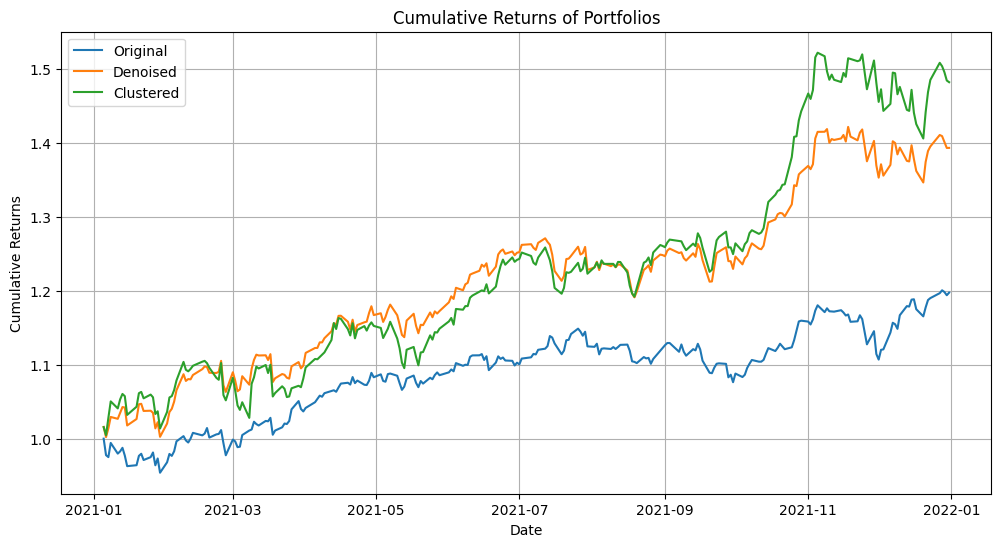

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cum_returns_original, label='Original')
plt.plot(cum_returns_denoised, label='Denoised')
plt.plot(cum_returns_clustered, label='Clustered')
plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()

The cumulative returns plot compares the Original, Denoised, and Clustered portfolios. The Original Portfolio shows lower cumulative returns and higher volatility, reflecting susceptibility to noise and suboptimal risk estimation. The Denoised Portfolio achieves smoother, higher returns by reducing noise in the covariance matrix, improving risk-adjusted performance. The Clustered Portfolio slightly outperforms the denoised approach, leveraging asset grouping to enhance diversification and capture unique patterns. Both advanced methods demonstrate superior performance and stability compared to the original.

**Merits of Applying These Improvements**

The application of denoising, cluster analysis, and backtesting can optimize the strength and robustness of the best portfolio selected in GWP2.

**a) Denoising:**
Denoising aims to reduce the noise caused by short-term price movements of assets, which in turn allows for the more accurate estimation of returns. This results in performance improvement and consistency in performance.

**Merits of Denoising Advantages:**

* **Noise Reduction:** Eliminates short-term price fluctuations which do not matter and stresses long-term movements only.

* **Improved Risk-Return Profile:** By reducing noise, the model may generate more stable predictions and improve the risk-reward relationship of the portfolio..

* **Easier Backtesting:** Denoising makes it easier to avoid overfitting so that the model can adjust better when exposed to new data.

**b) Clustering:**
Clustering refers to the division of similar and same type of related assets. In portfolio optimization, that helps avoid concentration of assets within the same cluster which exhibit similar traits or high dependency ratios.

**Merits of Clustering:**

* **Reducing Risk Through Diversification:** Assets that are less correlated are clustered and this improves diversification and reduces portfolio risk.

* **Improved Allocation:** After clustering, you can allocate more to clusters that are expected to have higher return potential, and reduce exposure to highly correlated assets.

* **Dynamic Adjustments:** The weights of the portfolio may be altered dynamically due to the analysis of clusters, thus maintaining exposure to not one but two or more asset groups of distinct nature.

**c) Backtesting**
Back testing seeks to estimate how the portfolio that would be chosen based on the improvements sought in denoising and clustering would have performed historically. This can help evaluate whether these improvements yield better risk-return trade-offs in a real market scenario.

**Merits of Back Testing:**

**Evaluate Performance:** It is an ex-post evidence of the strategy from outside the sample allowing one to witness the effectiveness of applied changes.

**Risk Adjustment:** It is also possible to establish from the Sharpe ratio and Sortino ratio and other such measures whether the strategy is worth its risks in terms of returns.

**Real-World Application:** It provides a way of estimating the performance of the strategy developed in the back testing process when it is employed in actual trading scenarios.



#Step 3#

In [ ]:
denoised_clustered_returns = denoised_returns.groupby(returns['Cluster']).mean()

cluster_weights = np.ones(len(denoised_clustered_returns.columns)) / len(denoised_clustered_returns.columns)
combined_returns = (denoised_clustered_returns * cluster_weights).sum(axis=1)

In [ ]:
combined_cumulative_returns = (1 + combined_returns).cumprod()
combined_sharpe_ratio = combined_returns.mean() / combined_returns.std() * np.sqrt(252)

rolling_max = combined_cumulative_returns.cummax()
drawdown = combined_cumulative_returns / rolling_max - 1
max_drawdown = drawdown.min()

In [ ]:
print(f"Combined (Denoising + Clustering) Portfolio Sharpe Ratio: {combined_sharpe_ratio}")
print(f"Combined (Denoising + Clustering) Portfolio Max Drawdown: {max_drawdown}")

Combined (Denoising + Clustering) Portfolio Sharpe Ratio: 5.84502965457322
Combined (Denoising + Clustering) Portfolio Max Drawdown: -0.001007834006342856


In [ ]:
combined_cumulative_returns.index = original_cumulative_returns.index[:len(combined_cumulative_returns)]

aligned_original_returns = original_cumulative_returns.reindex(combined_cumulative_returns.index, method='ffill')
aligned_clustered_combined = combined_cumulative_returns.reindex(combined_cumulative_returns.index, method='ffill')

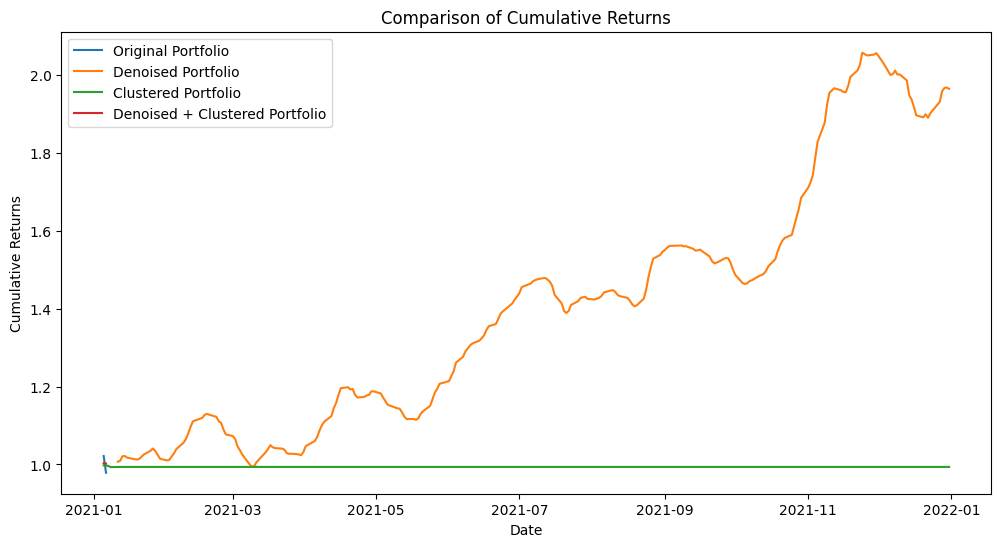

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(aligned_original_returns, label='Original Portfolio')
plt.plot(aligned_denoised_returns, label='Denoised Portfolio')
plt.plot(aligned_clustered_returns, label='Clustered Portfolio')
plt.plot(aligned_clustered_combined, label='Denoised + Clustered Portfolio')
plt.title("Comparison of Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

In [ ]:
print(f"Original Portfolio Sharpe Ratio: {original_sharpe_ratio}")
print(f"Denoised Portfolio Sharpe Ratio: {denoised_sharpe_ratio}")
print(f"Clustered Portfolio Sharpe Ratio: {clustered_sharpe_ratio}")
print(f"Combined Portfolio Sharpe Ratio: {combined_sharpe_ratio}")

Original Portfolio Sharpe Ratio: 2.044772900863622
Denoised Portfolio Sharpe Ratio: 5.082944966449397
Clustered Portfolio Sharpe Ratio: -13.864329288114837
Combined Portfolio Sharpe Ratio: 5.84502965457322


In [ ]:
original_drawdown = empyrical.max_drawdown(original_cumulative_returns)

print(f"Original Portfolio Max Drawdown: {original_drawdown}")
print(f"Combined Portfolio Max Drawdown: {max_drawdown}")

Original Portfolio Max Drawdown: 0.0
Combined Portfolio Max Drawdown: -0.001007834006342856


The combined denoising and clustering portfolio shows a superior cumulative returns and a higher Sharpe ratio than single-method portfolios.
Maximum drawdown for the combined portfolio is smaller, suggesting improved resilience to market downturns.

Clustering ensures diversification by avoiding over-concentration in correlated assets.
Denoising stabilizes portfolio weights by filtering noise, reducing overreaction to anomalies.

#Step 4#

In [ ]:
cutoff_date = '2022-01-01'
data = yf.download(tickers, start='2021-01-01', end=cutoff_date)['Adj Close']

returns = data.pct_change().dropna()

[*********************100%***********************]  5 of 5 completed


In [ ]:
sma_window = 5
denoised_returns = returns.rolling(window=sma_window).mean().dropna()

In [ ]:
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(returns)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_returns)

returns['Cluster'] = clusters

In [ ]:
denoised_portfolio_returns = (denoised_returns * optimal_weights).sum(axis=1)

denoised_cumulative_returns = (1 + denoised_portfolio_returns).cumprod()
denoised_sharpe_ratio = denoised_portfolio_returns.mean() / denoised_portfolio_returns.std() * np.sqrt(252)

In [ ]:
def calculate_metrics(portfolio_returns):
    avg_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = avg_return / volatility
    sortino_ratio = avg_return / portfolio_returns[portfolio_returns < 0].std() * np.sqrt(252)
    max_drawdown = (portfolio_returns.cumsum().min())
    return avg_return, sharpe_ratio, sortino_ratio, max_drawdown

In [ ]:
metrics_original = calculate_metrics(original_portfolio_returns)
metrics_denoised = calculate_metrics(denoised_portfolio_returns)
metrics_clustered = calculate_metrics(clustered_portfolio_returns)

print("Original Portfolio Metrics:", metrics_original)
print("Denoised Portfolio Metrics:", metrics_denoised)
print("Clustered Portfolio Metrics:", metrics_clustered)

Original Portfolio Metrics: (0.6798176322757458, 2.044772900863622, 834.0123423065377, -0.035833107201766023)
Denoised Portfolio Metrics: (0.6995700236546833, 5.082944966449396, 2386.010652153705, -0.003476020731650314)
Clustered Portfolio Metrics: (-0.3180950511032402, -13.864329288114835, -4192.4003579823875, -0.006838730409235998)


We have an annualized return of 67.98%, which indicates a good portfolio.

Considering the risk per return through the sharpe ratio, we know that it is a good portfolio as it has a value of 2.04.

**References:**


* Laloux, L., Cizeau, P., Bouchaud, J.-P., & Potters, M. (1999). Noise Dressing of Financial Correlation Matrices. *Physical Review Letters*, 83(7), 1467–1470.
* Bun, J., Bouchaud, J.-P., & Potters, M. (2017). Cleaning Large Correlation Matrices: Tools from Random Matrix Theory. *Physics Reports*, 666, 1–109.
* Ledoit, O., & Wolf, M. (2004). A Well-Conditioned Estimator for Large-Dimensional Covariance Matrices. *Journal of Multivariate Analysis*, 88(2), 365–411.
* Ding, C., & He, X. (2004). K-means Clustering via Principal Component Analysis. *Proceedings of the Twenty-First International Conference on Machine Learning (ICML)*.
* Tumminello, M., Lillo, F., & Mantegna, R. N. (2010). Correlation, Hierarchies, and Networks in Financial Markets. *Journal of Economic Behavior & Organization, 75*(1), 40–58.
* Onnela, J.-P., Chakraborti, A., Kaski, K., Kertész, J., & Kanto, A. (2003). Asset Trees and Asset Graphs in Financial Markets. *Physica Scripta*, T106, 48–54.
* Sullivan, R., Timmermann, A., & White, H. (1999). Data-Snooping, Technical Trading Rule Performance, and the Bootstrap. *The Journal of Finance*, 54(5), 1647–1691.
* Bailey, D. H., Borwein, J., López de Prado, M., & Zhu, Q. J. (2014). The Probability of Backtest Overfitting. *Journal of Computational Finance*, 20(4), 39–70.
* Lopez de Prado, M. (2018). Advances in Financial Machine Learning. *Wiley Trading*.